# Pymaceuticals Inc.
---

### Analysis

Review all the figures and tables that you generated in this assignment. Write at least three observations or inferences that can be made from the data.

- According to the data, Ramicane and Capomulin were the drugs with the most Timepoints which at the very least equates to the most data points but could mean that they were the most successful drugs which caused more timepoints. 
- According to the data, Ramicane and Capomulin were the data with the best average Tumor Volume with their lowest average numbers as well as a clear boxplot with a lower IQR than the rest. Infubinol had one outlier which was lower than the rest and so is worth continuing to investigate just in case but it could be a fluke bringing their data averages down.
- Finally, according to the data, the weight of the mouse strongly correlates to the volume of the tumor. This could be because the tumor is large causing the weight to be bigger, but there is a strong correlation and worth further investigationg.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(study_results,mouse_metadata, on='Mouse ID',how="left")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(mouse_df['Mouse ID'].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df[mouse_df[['Mouse ID','Timepoint']].duplicated()==True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df.loc[mouse_df['Mouse ID']=='g989',:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_df = mouse_df.loc[mouse_df['Mouse ID']!='g989',:]
mouse_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_groups = mouse_clean_df.groupby('Drug Regimen')
mean_mouse = mouse_groups['Tumor Volume (mm3)'].mean()
median_mouse = mouse_groups['Tumor Volume (mm3)'].median()
variance_mouse = mouse_groups['Tumor Volume (mm3)'].var()
std_mouse = mouse_groups['Tumor Volume (mm3)'].std()
sem_mouse = mouse_groups['Tumor Volume (mm3)'].sem()
mouse_summary_df =pd.DataFrame({'Mean Tumor Volume':mean_mouse,
                               'Median Tumor Volume':median_mouse,
                               "Tumor Volume Variance":variance_mouse,
                               "Tumor Volume Std. Dev.":std_mouse,
                               "Tumor Volume Std. Err.":sem_mouse})
mouse_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_summary_2 = mouse_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
mouse_summary_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

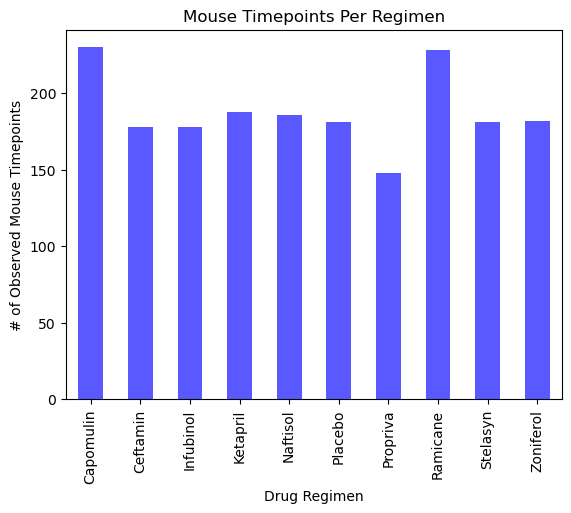

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoints = mouse_clean_df.groupby('Drug Regimen')['Timepoint'].count()
pandas_chart = mouse_timepoints.plot(kind='bar',title = "Mouse Timepoints Per Regimen",color='b',alpha=0.65)
pandas_chart.set_xlabel("Drug Regimen")
pandas_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

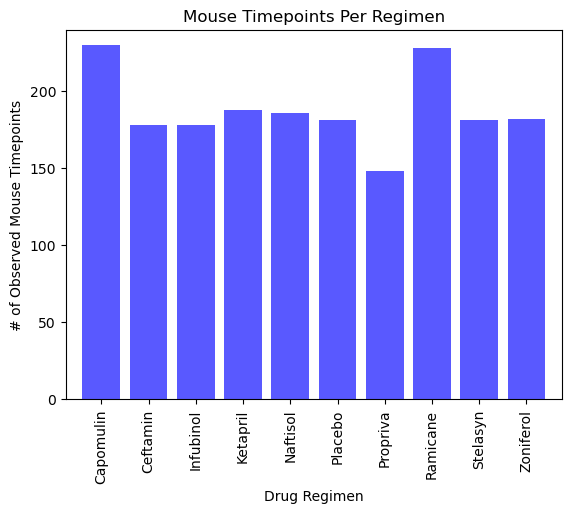

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_timepoints = mouse_clean_df.groupby('Drug Regimen')['Timepoint'].count()
x_axis = [0,1,2,3,4,5,6,7,8,9]
plt.bar(x_axis, mouse_timepoints, color='b', alpha=0.65, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mouse_timepoints.index, rotation = 90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mouse_timepoints)+10)
plt.title("Mouse Timepoints Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

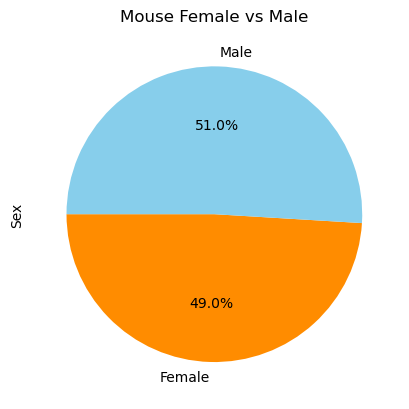

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = mouse_clean_df.groupby('Sex')['Mouse ID'].count()
mouse_sex.plot(kind='pie',title = "Mouse Female vs Male",
               ylabel = 'Sex',colors= ['darkorange','skyblue'],
               autopct="%1.1f%%",startangle=180)
plt.show()

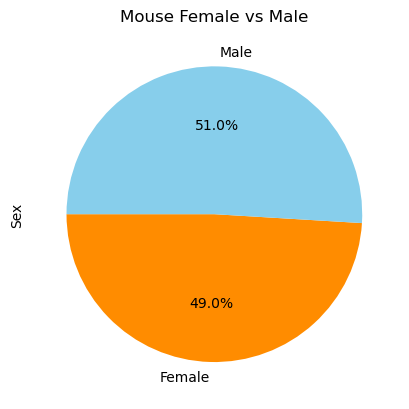

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = mouse_clean_df.groupby('Sex')['Mouse ID'].count()
plt.pie(mouse_sex,labels=mouse_sex.index, colors= ['darkorange','skyblue'],
               autopct="%1.1f%%",startangle=180)
plt.title("Mouse Female vs Male")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens_df = mouse_clean_df.loc[(mouse_clean_df['Drug Regimen']=='Capomulin')|
                                      (mouse_clean_df['Drug Regimen']=='Ramicane')|
                                     (mouse_clean_df['Drug Regimen']=='Infubinol')|
                                     (mouse_clean_df['Drug Regimen']=='Ceftamin'),:]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint =pd.DataFrame(four_regimens_df.groupby('Mouse ID')['Timepoint'].max())
greatest_timepoint.reset_index(inplace=True)
greatest_timepoint = greatest_timepoint.rename(columns = {'index':'Mouse ID'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
four_regimens_with_greatest_df = pd.merge(four_regimens_df, greatest_timepoint, on=['Mouse ID','Timepoint'])
four_regimens_with_greatest_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [119]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = four_regimens_with_greatest_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {treatments[0]:[],treatments[1]:[],treatments[2]:[],treatments[3]:[]}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in range(len(four_regimens_with_greatest_df['Mouse ID'])):
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    if(four_regimens_with_greatest_df["Drug Regimen"][x]==treatments[0]):
        tumor_vol_data[treatments[0]].append(four_regimens_with_greatest_df["Tumor Volume (mm3)"][x])
    elif(four_regimens_with_greatest_df["Drug Regimen"][x]==treatments[1]):
        tumor_vol_data[treatments[1]].append(four_regimens_with_greatest_df["Tumor Volume (mm3)"][x])
    elif(four_regimens_with_greatest_df["Drug Regimen"][x]==treatments[2]):
        tumor_vol_data[treatments[2]].append(four_regimens_with_greatest_df["Tumor Volume (mm3)"][x])
    elif(four_regimens_with_greatest_df["Drug Regimen"][x]==treatments[3]):
        tumor_vol_data[treatments[3]].append(four_regimens_with_greatest_df["Tumor Volume (mm3)"][x])

# Determine outliers using upper and lower bounds
quartiles = {treatments[0]:pd.DataFrame(tumor_vol_data[treatments[0]]).quantile([.25,.5,.75]),
             treatments[1]:pd.DataFrame(tumor_vol_data[treatments[1]]).quantile([.25,.5,.75]),
             treatments[2]:pd.DataFrame(tumor_vol_data[treatments[2]]).quantile([.25,.5,.75]),
             treatments[3]:pd.DataFrame(tumor_vol_data[treatments[3]]).quantile([.25,.5,.75])}

lb_iqr_ub = {treatments[0]:[quartiles[treatments[0]][0][0.25]-(1.5*(quartiles[treatments[0]][0][0.75]-quartiles[treatments[0]][0][0.25])),
                           quartiles[treatments[0]][0][0.75]-quartiles[treatments[0]][0][0.25],
                           quartiles[treatments[0]][0][0.75]+(1.5*(quartiles[treatments[0]][0][0.75]-quartiles[treatments[0]][0][0.25]))],
             treatments[1]:[quartiles[treatments[1]][0][0.25]-(1.5*(quartiles[treatments[1]][0][0.75]-quartiles[treatments[1]][0][0.25])),
                           quartiles[treatments[1]][0][0.75]-quartiles[treatments[1]][0][0.25],
                           quartiles[treatments[1]][0][0.75]+(1.5*(quartiles[treatments[1]][0][0.75]-quartiles[treatments[1]][0][0.25]))],
             treatments[2]:[quartiles[treatments[2]][0][0.25]-(1.5*(quartiles[treatments[2]][0][0.75]-quartiles[treatments[2]][0][0.25])),
                           quartiles[treatments[2]][0][0.75]-quartiles[treatments[2]][0][0.25],
                           quartiles[treatments[2]][0][0.75]+(1.5*(quartiles[treatments[2]][0][0.75]-quartiles[treatments[2]][0][0.25]))],
             treatments[3]:[quartiles[treatments[3]][0][0.25]-(1.5*(quartiles[treatments[3]][0][0.75]-quartiles[treatments[3]][0][0.25])),
                           quartiles[treatments[3]][0][0.75]-quartiles[treatments[3]][0][0.25],
                           quartiles[treatments[3]][0][0.75]+(1.5*(quartiles[treatments[3]][0][0.75]-quartiles[treatments[3]][0][0.25]))]}

outliers={treatments[0]:[],treatments[1]:[],treatments[2]:[],treatments[3]:[]}
for x in range(len(four_regimens_with_greatest_df['Mouse ID'])):
    if(four_regimens_with_greatest_df["Drug Regimen"][x]==treatments[0]):
        if((four_regimens_with_greatest_df["Tumor Volume (mm3)"][x]<lb_iqr_ub[treatments[0]][0]) |(four_regimens_with_greatest_df["Tumor Volume (mm3)"][x]>lb_iqr_ub[treatments[0]][2])):
            outliers[treatments[0]].append(four_regimens_with_greatest_df["Tumor Volume (mm3)"][x])
    elif(four_regimens_with_greatest_df["Drug Regimen"][x]==treatments[1]):
        if((four_regimens_with_greatest_df["Tumor Volume (mm3)"][x]<lb_iqr_ub[treatments[1]][0]) |(four_regimens_with_greatest_df["Tumor Volume (mm3)"][x]>lb_iqr_ub[treatments[1]][2])):
            outliers[treatments[1]].append(four_regimens_with_greatest_df["Tumor Volume (mm3)"][x])
    elif(four_regimens_with_greatest_df["Drug Regimen"][x]==treatments[2]):
        if((four_regimens_with_greatest_df["Tumor Volume (mm3)"][x]<lb_iqr_ub[treatments[2]][0]) |(four_regimens_with_greatest_df["Tumor Volume (mm3)"][x]>lb_iqr_ub[treatments[2]][2])):
            outliers[treatments[2]].append(four_regimens_with_greatest_df["Tumor Volume (mm3)"][x])
    elif(four_regimens_with_greatest_df["Drug Regimen"][x]==treatments[3]):
        if((four_regimens_with_greatest_df["Tumor Volume (mm3)"][x]<lb_iqr_ub[treatments[3]][0]) |(four_regimens_with_greatest_df["Tumor Volume (mm3)"][x]>lb_iqr_ub[treatments[3]][2])):
            outliers[treatments[3]].append(four_regimens_with_greatest_df["Tumor Volume (mm3)"][x])
for x in range(len(treatments)):
    print(f"{treatments[x]}'s potential outliers:{outliers[treatments[x]]}")


Ceftamin's potential outliers:[]
Infubinol's potential outliers:[36.3213458]
Ramicane's potential outliers:[]
Capomulin's potential outliers:[]


Text(0, 0.5, 'Final Tumor Volume(mm3)')

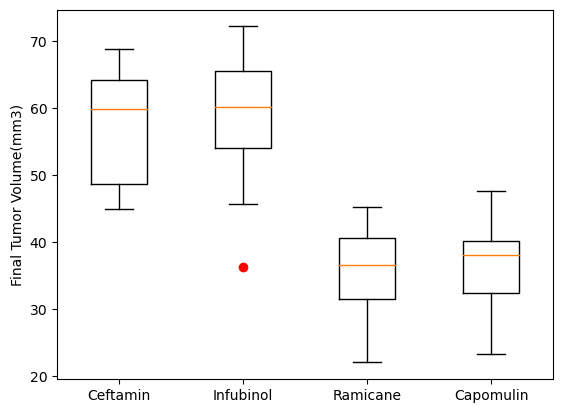

In [118]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data.values(), 0, 'r')
ax1.set_xticklabels(tumor_vol_data.keys())
ax1.set_ylabel('Final Tumor Volume(mm3)')

## Line and Scatter Plots

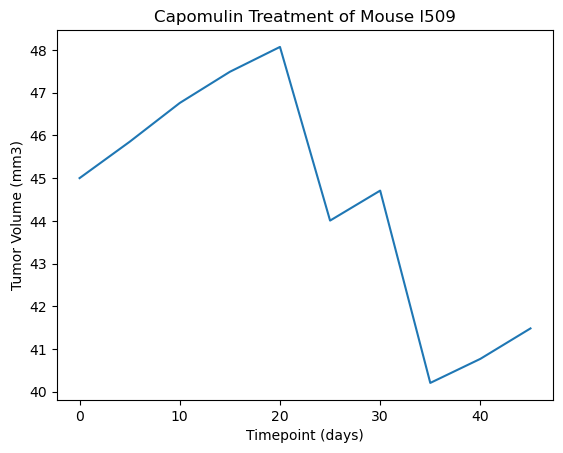

In [109]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
drug = 'Capomulin'
mouse_id = 'l509'
single_mouse = mouse_clean_df.loc[(mouse_clean_df['Drug Regimen']==drug)& (mouse_clean_df['Mouse ID']==mouse_id),:]
plt.plot(single_mouse['Timepoint'],single_mouse['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title(drug + " Treatment of Mouse " + mouse_id)
plt.show()

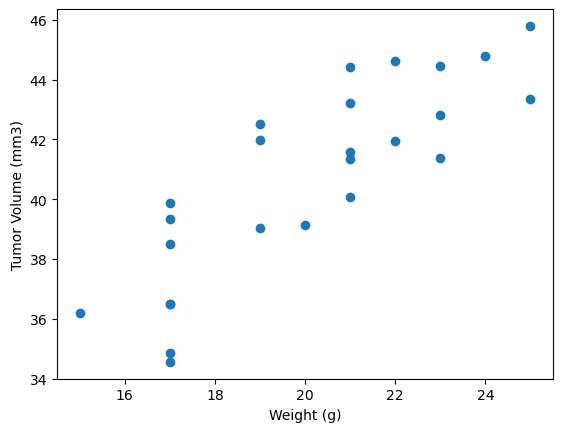

In [111]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug = 'Capomulin'

mouse_drug_regimen = mouse_clean_df.loc[(mouse_clean_df['Drug Regimen']==drug),:]
dr_group = mouse_drug_regimen.groupby('Mouse ID')
plt.scatter(dr_group['Weight (g)'].mean(),dr_group['Tumor Volume (mm3)'].mean())
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


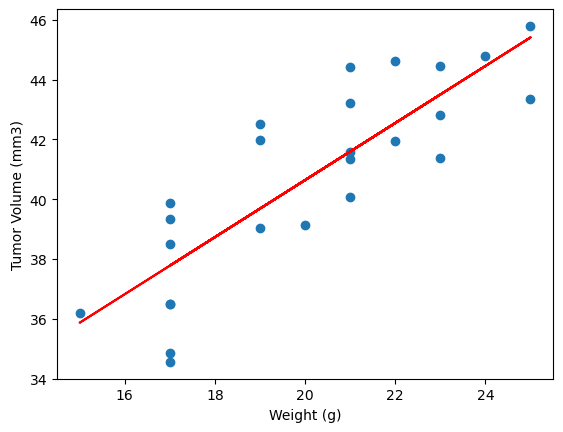

In [115]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(dr_group['Weight (g)'].mean(), dr_group['Tumor Volume (mm3)'].mean())
regress_values = dr_group['Weight (g)'].mean() * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(dr_group['Weight (g)'].mean(),regress_values,"r-")

correlation = st.pearsonr(dr_group['Weight (g)'].mean(), dr_group['Tumor Volume (mm3)'].mean())
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.scatter(dr_group['Weight (g)'].mean(),dr_group['Tumor Volume (mm3)'].mean())
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()